<a href="https://colab.research.google.com/github/SURESHBEEKHANI/-Implementation-of-RNNs-and-LSTM/blob/main/Recurrent%20Neural%20Network%20(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Recurrent Neural Network (RNN)

---



In [44]:
# Import the NumPy library for numerical operations, using 'np' as a shorthand
import numpy as np

# Import the pandas library for data manipulation and analysis, using 'pd' as a shorthand
import pandas as pd

# Import the TensorFlow library for building and training machine learning models, using 'tf' as a shorthand
import tensorflow as tf
from tensorflow.keras.models import Sequential

# Import specific layers from TensorFlow's Keras module for constructing neural networks
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding

# Import the Tokenizer class from TensorFlow's Keras preprocessing module for converting text to sequences of tokens
from tensorflow.keras.preprocessing.text import Tokenizer

# Import the pad_sequences function from TensorFlow's Keras preprocessing module for padding sequences to a uniform length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import the 'itertools' library to help with list operations, such as flattening nested lists
import itertools

# Summary:
# This code imports libraries and modules necessary for data manipulation, machine learning model building, and text processing.
# NumPy and pandas are used for numerical operations and data handling. TensorFlow and its Keras module are used for creating and training neural networks.
# The 'itertools' library is imported for list operations such as flattening nested lists.


#  Load the data

In [45]:
# Load the data from a CSV file called "data.csv" into a pandas DataFrame
data = pd.read_csv("data.csv")

# Convert the DataFrame into a list of lists, where each inner list represents a row of the DataFrame
list_of_lists = data.values.tolist()

# Flatten the list of lists into a single list containing all the elements
flat_list = list(itertools.chain.from_iterable(list_of_lists))

# Print the flattened list to view all the data in a single, combined list
print(flat_list)

# Summary:
# This code reads data from a CSV file into a DataFrame, converts the DataFrame into a list of lists,
# flattens that list of lists into a single list, and then prints the resulting flat list.


['"Machine learning algorithms analyze vast amounts of data."', '"AI technologies drive innovation across different sectors."', '"Machine learning models predict outcomes with high accuracy."', '"AI systems can automate complex tasks effectively."', '"Machine learning helps in personalized recommendations and ads."', '"AI advancements are transforming how we interact with technology."', '"Machine learning enhances decision-making through data-driven insights."', '"AI and machine learning reshape traditional business processes."', '"Machine learning models adapt and learn from new data."', '"AI systems provide real-time analysis for quick decisions."', '"Machine learning techniques improve over time with more data."', '"AI applications streamline operations in diverse fields."', '"Machine learning aids in detecting patterns and anomalies."', '"AI-driven tools offer personalized user experiences."', '"Machine learning automates routine tasks with precision."', '"AI technologies support a

# Tokenization and Preprocessing data


Tokenization is the process of breaking text into smaller units (words, sentences, etc.). Preprocessing involves cleaning and normalizing text by steps such as lowercasing, removing punctuation and stop words, and stemming or lemmatizing words. Together, these steps prepare text data for analysis or machine learning.

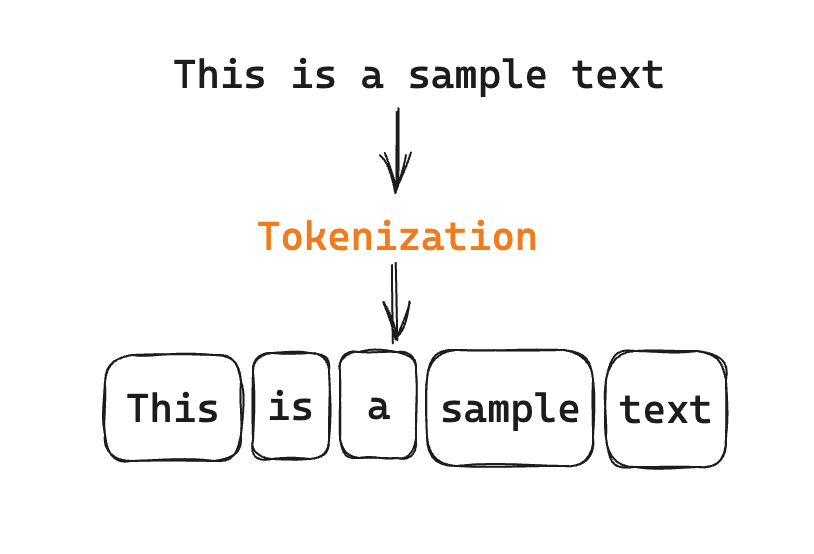

In [46]:
# Initialize the Tokenizer object to preprocess and vectorize text data
tokenizer = Tokenizer()

# Fit the Tokenizer on the list of sentences (or texts) to build the vocabulary
tokenizer.fit_on_texts(flat_list)

# Get the total number of unique words in the vocabulary, and assign and index value
total_words = len(tokenizer.word_index) + 1

# Print the total number of unique words in the vocabulary
print(total_words)

# Print the word index dictionary that maps words to their integer index
print(tokenizer.word_index)


# Initialize an empty list to hold the input sequences
input_sequence = []

# Iterate through each sentence in the list of sentences
for line in flat_list:
    # Convert each sentence into a sequence of integers using the tokenizer
    # The 'texts_to_sequences' method converts words to their corresponding integer indices
    token_list = tokener.texts_to_sequences([line])[0]
    for i in range(1, len(token_list) + 1):  # Use len(token_list) + 1 to include the last element
        n_gram_sequence = token_list[:i]
        input_sequence.append(n_gram_sequence)

# Find the maximum sequence length
max_sequence_len = max(len(seq) for seq in input_sequence)

# Pad sequences to
padded_sequences = pad_sequences(input_sequence, maxlen=max_sequence_len, padding='pre')
print(padded_sequences)

# Summary:
# This code initializes a Tokenizer, fits it on a list of sentences to build the vocabulary,
# and then prints the total number of unique words and their corresponding indices in the word index.

284
{'in': 1, 'machine': 2, 'learning': 3, 'ai': 4, 'systems': 5, 'models': 6, 'driven': 7, 'technologies': 8, 'enhance': 9, 'and': 10, 'advancements': 11, 'efficiency': 12, 'accuracy': 13, 'improves': 14, 'assist': 15, 'data': 16, 'innovations': 17, 'to': 18, 'optimizing': 19, 'support': 20, 'contribute': 21, 'supports': 22, 'of': 23, 'time': 24, 'management': 25, 'the': 26, 'real': 27, 'solutions': 28, 'platforms': 29, 'improve': 30, 'facilitate': 31, 'research': 32, 'aids': 33, 'analytics': 34, 'digital': 35, 'predictive': 36, 'financial': 37, 'customer': 38, 'analysis': 39, 'enhances': 40, 'decision': 41, 'making': 42, 'operations': 43, 'personalized': 44, 'business': 45, 'tools': 46, 'optimize': 47, 'autonomous': 48, 'strategies': 49, 'personalization': 50, 'intelligent': 51, 'algorithms': 52, 'applications': 53, 'user': 54, 'detection': 55, 'development': 56, 'marketing': 57, 'smart': 58, 'recommendations': 59, 'smarter': 60, 'supply': 61, 'virtual': 62, 'content': 63, 'advance':

 # Split the data into features (x) and targets (y)

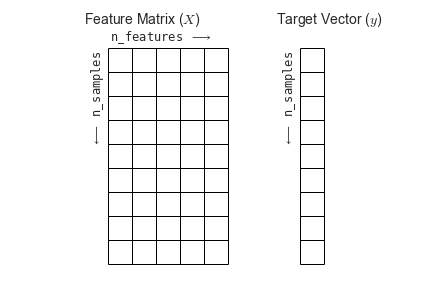



In [47]:
# Split the data into features (x) and targets (y)
# Features (x) include all columns except the last one
x_train = padded_sequences[:, :-1]

# Targets (y) include only the last column
y_train = padded_sequences[:, -1]

# Print the features to verify their content
print("Features (x):")
print(x)

# Print the targets to verify their content
print("Targets (y):")
print(y)


Features (x):
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  2  3]
 ...
 [ 0  0  0 ... 28  9 12]
 [ 0  0  0 ...  9 12  1]
 [ 0  0  4 ... 12  1 35]]
Targets (y):
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Convert the target data (y) to one-hot encoded format

In [48]:
# Convert the target data (y) to one-hot encoded format
# 'num_classes' specifies the total number of classes (e.g., total_words)
y = tf.keras.utils.to_categorical(y_train, num_classes=total_words)

# Print the one-hot encoded target data to verify the result
print("One-hot encoded targets (y):")
print(y)

One-hot encoded targets (y):
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


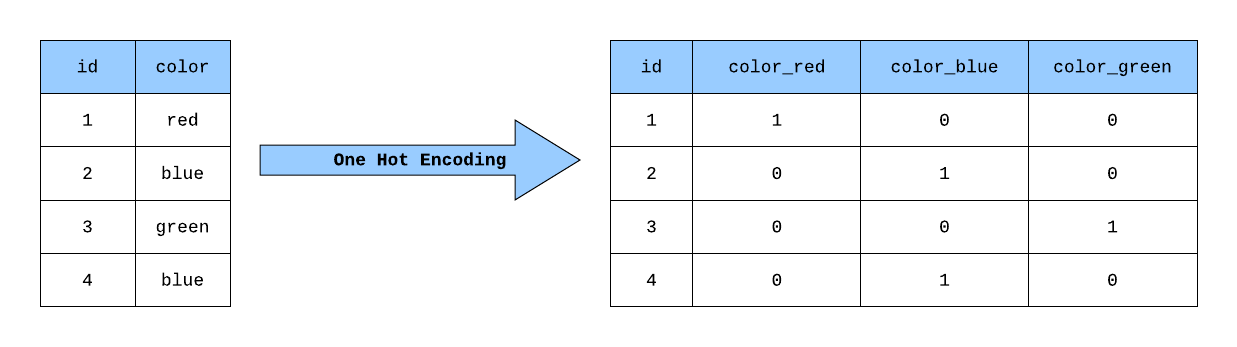

# Define Architecture RNN (Recurrent Neural Network)

In [49]:
# Define the model
model = Sequential([
    # Embedding layer: converts input sequences of integers into dense vectors of fixed size
    Embedding(input_dim=total_words,  # Size of the vocabulary
              output_dim=10,           # Dimension of the dense embedding vectors
              input_length=max_sequence_len-1),  # Length of input sequences

    # Simple RNN layer: processes the sequence data and retains the temporal information
    SimpleRNN(10),  # Number of units in the RNN layer

    # Dense layer: outputs the probability distribution over the vocabulary
    Dense(total_words,            # Size of the output layer (same as vocabulary size)
          activation='softmax')   # Softmax activation to produce probability distribution
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [50]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Compile the model
model.compile(
    optimizer='adam',           # Optimizer to use for training
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']        # Metric to track during training and evaluation
)

In [52]:
# Train the model
history = model.fit(
    x_train,                    # Input data
    y_train,                    # Target labels
    epochs=50,                  # Number of training epochs
    batch_size=2,              # Number of samples per gradient update
    validation_split=0.2,       # Fraction of data to be used for validation
    verbose=1                   # Verbosity mode: 1 for progress bar
)

Epoch 1/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0819 - loss: 5.1535 - val_accuracy: 0.1791 - val_loss: 4.1278
Epoch 2/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1444 - loss: 4.3837 - val_accuracy: 0.1766 - val_loss: 3.8734
Epoch 3/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1669 - loss: 4.0994 - val_accuracy: 0.2413 - val_loss: 3.6625
Epoch 4/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2122 - loss: 3.9195 - val_accuracy: 0.2413 - val_loss: 3.4764
Epoch 5/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2359 - loss: 3.7199 - val_accuracy: 0.2637 - val_loss: 3.2327
Epoch 6/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2390 - loss: 3.5174 - val_accuracy: 0.2886 - val_loss: 3.0167
Epoch 7/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2577 - loss: 3.2925 - val_accuracy: 0.3358 - val_loss: 2.8689
Epoch 8/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2707 - loss: 3.1891 - val_accuracy: 0.

In [69]:
# This function predicts the next word(s) given a starting piece of text (seed_text).
def predict_next_word(seed_text, next_words=1):
    # Loop to predict the next word 'next_words' times
    for _ in range(next_words):
        # Convert the seed text into a format that the model can understand (a sequence of numbers)
        token_list = tokenizer.texts_to_sequences([seed_text])

        # Ensure the sequence is the right length for the model by padding it with zeros if needed
        token_list = pad_sequences(token_list, maxlen=max_sequence_len, padding='pre')

        # Use the model to predict the probabilities of the next word
        predicted_probs = model.predict(token_list, verbose=0)
        # Find the index of the word with the highest probability
        predicted_index = np.argmax(predicted_probs, axis=-1)[0]

        # Convert the index back into the actual word
        predicted_word = tokenizer.index_word.get(predicted_index, '')

        # Add the predicted word to the end of the seed text
        seed_text += ' ' + predicted_word

    # Return the updated seed text with the predicted words added
    return seed_text

# Example usage of the function:
seed_text = "what is ai "
# Predict the next 4 words based on the seed text
predicted_text = predict_next_word(seed_text, next_words=50)
# Print the result
print(predicted_text)


what is ai  technologies contribute to advancements in data driven processes devices ai learning models enhance accuracy in financial forecasting and interaction interfaces technology ai learning models enhance accuracy in various industries effectively ai technologies contribute to advancements in data driven processes devices ai learning models enhance accuracy in financial forecasting and interaction
